In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind

In [5]:
df = pd.read_csv('n_cleaned_data.csv')
df['Score Groep'] = df['GSQS: Score'].apply(lambda x: 'normale slaapkwaliteit' if x < 6 else 'slechte slaapkwaliteit')
df.rename(columns={'Go-No Go task: Aantal No-go fout': 'Go-No Go task: Aantal No-Go fout'}, inplace=True)

print(shapiro(df['GSQS: Score']))

ShapiroResult(statistic=0.952089250087738, pvalue=0.0052443258464336395)


C:\Users\Alvin\AppData\Local\Temp\ipykernel_18860\4083291332.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(y = df_f['Go-No Go task: Aantal No-Go fout'], x = df_f['Score Groep'], ci=False)


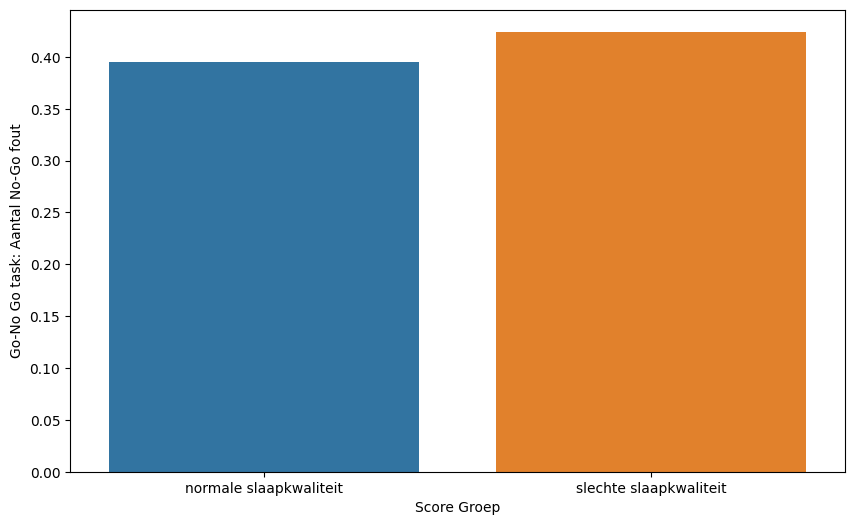

              Score Groep  Go-No Go task: Aantal No-Go fout
0  normale slaapkwaliteit                          0.688889
1  slechte slaapkwaliteit                          0.424242


In [10]:
Q1 = df['Go-No Go task: Aantal No-Go fout'].quantile(0.25)
Q3 = df['Go-No Go task: Aantal No-Go fout'].quantile(0.75)
IQR = Q3 - Q1
low = Q1 - 1.5 * IQR
up = Q3 + 1.5 * IQR
outliers = df[(df['Go-No Go task: Aantal No-Go fout'] < low) | (df['Go-No Go task: Aantal No-Go fout'] > up)]

df_f = df[df['Go-No Go task: Aantal No-Go fout'] < 5]

plt.figure(figsize=(10, 6))
sns.barplot(y = df_f['Go-No Go task: Aantal No-Go fout'], x = df_f['Score Groep'], ci=False)
plt.show()

print(df.groupby('Score Groep')['Go-No Go task: Aantal No-Go fout'].mean().reset_index())

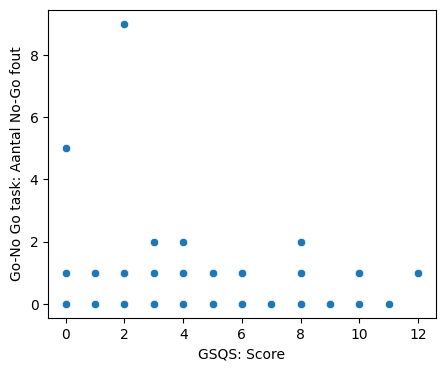

In [7]:
cor_mat = df[['Go-No Go task: Aantal No-Go fout','GSQS: Score']].corr()

plt.figure(figsize=(5, 4))
sns.scatterplot(x = df['GSQS: Score'], y = df['Go-No Go task: Aantal No-Go fout'])

plt.show()

In [8]:
p = stats.pearsonr(df['GSQS: Score'], df['Go-No Go task: Aantal No-Go fout'])
print(p)

a = df_f[df_f['Score Groep'] == 'normale slaapkwaliteit']['Go-No Go task: Aantal No-Go fout']
b = df_f[df_f['Score Groep'] == 'slechte slaapkwaliteit']['Go-No Go task: Aantal No-Go fout']

t_stat, p_value = stats.ttest_ind(a,b)
print(t_stat, p_value)

PearsonRResult(statistic=-0.11597482195786867, pvalue=0.3119484628183834)
-0.20926495765800113 0.8348164215207418
